# Breast Cancer Detection Model

In [1]:
# Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import sklearn.datasets
import pickle

## Data Pre-Processing

In [4]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
# breast_cancer_dataset

In [5]:
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [6]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
df["target"] = breast_cancer_dataset.target

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.shape

(569, 31)

In [10]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Exploratory Data Analysis

In [13]:
df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [13]:
# 1 --> Benign, 0 --> Malignant

In [49]:
df.groupby('target').mean()

KeyError: 0

#### Here, we can clearly see that all the values are slightly higher in case of malignant tumor.

In [15]:
corr_matrix = df.corr().round(3)

In [16]:
corr_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,...,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007,-0.730
mean texture,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,...,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119,-0.415
mean perimeter,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,...,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051,-0.743
mean area,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-0.283,...,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004,-0.709
mean smoothness,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,...,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499,-0.359
mean compactness,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,0.565,...,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687,-0.597
mean concavity,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,...,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515,-0.696
mean concave points,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,0.167,...,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369,-0.777
mean symmetry,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,0.480,...,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438,-0.330
mean fractal dimension,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000,...,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767,0.013


In [17]:
columns = list(breast_cancer_dataset.feature_names)
columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

# Conclusion from EDA -
1. There are no missing values.
2. All are continuous variables except target column.
3. There is slight imbalance in data as Benign cases are more than Malignant ones.
4. Mean of most features is higher for malignant cases.

## Data Visualisation

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'TARGET VALUES')

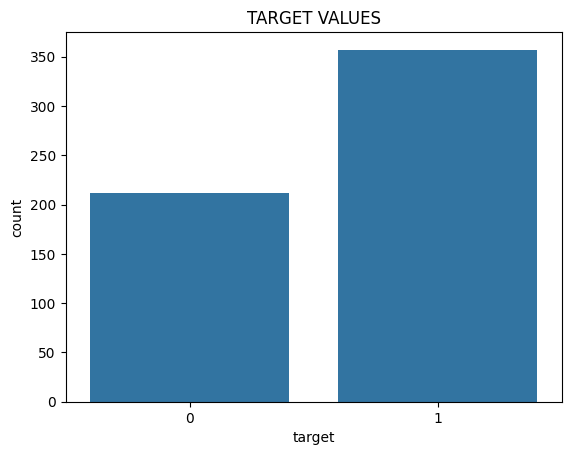

In [20]:
sns.countplot(data=df, x=df["target"])
plt.title("TARGET VALUES")

#### There are more cases of Benign tumour than malignant.

C:\Users\acer\AppData\Local\Temp\ipykernel_19560\1694397734.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, bins = 10)


<Axes: ylabel='Density'>

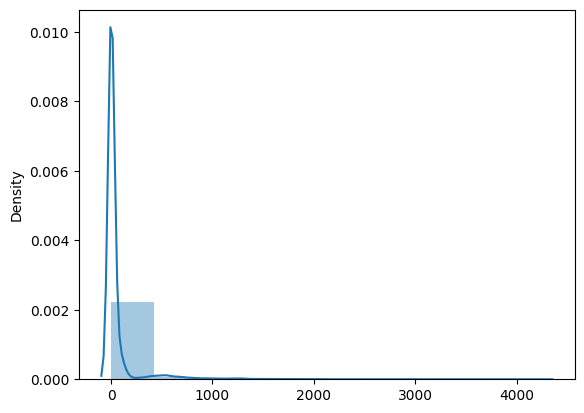

In [21]:
sns.distplot(df, bins = 10)

#### This data does not follow normal distribution.

<Axes: >

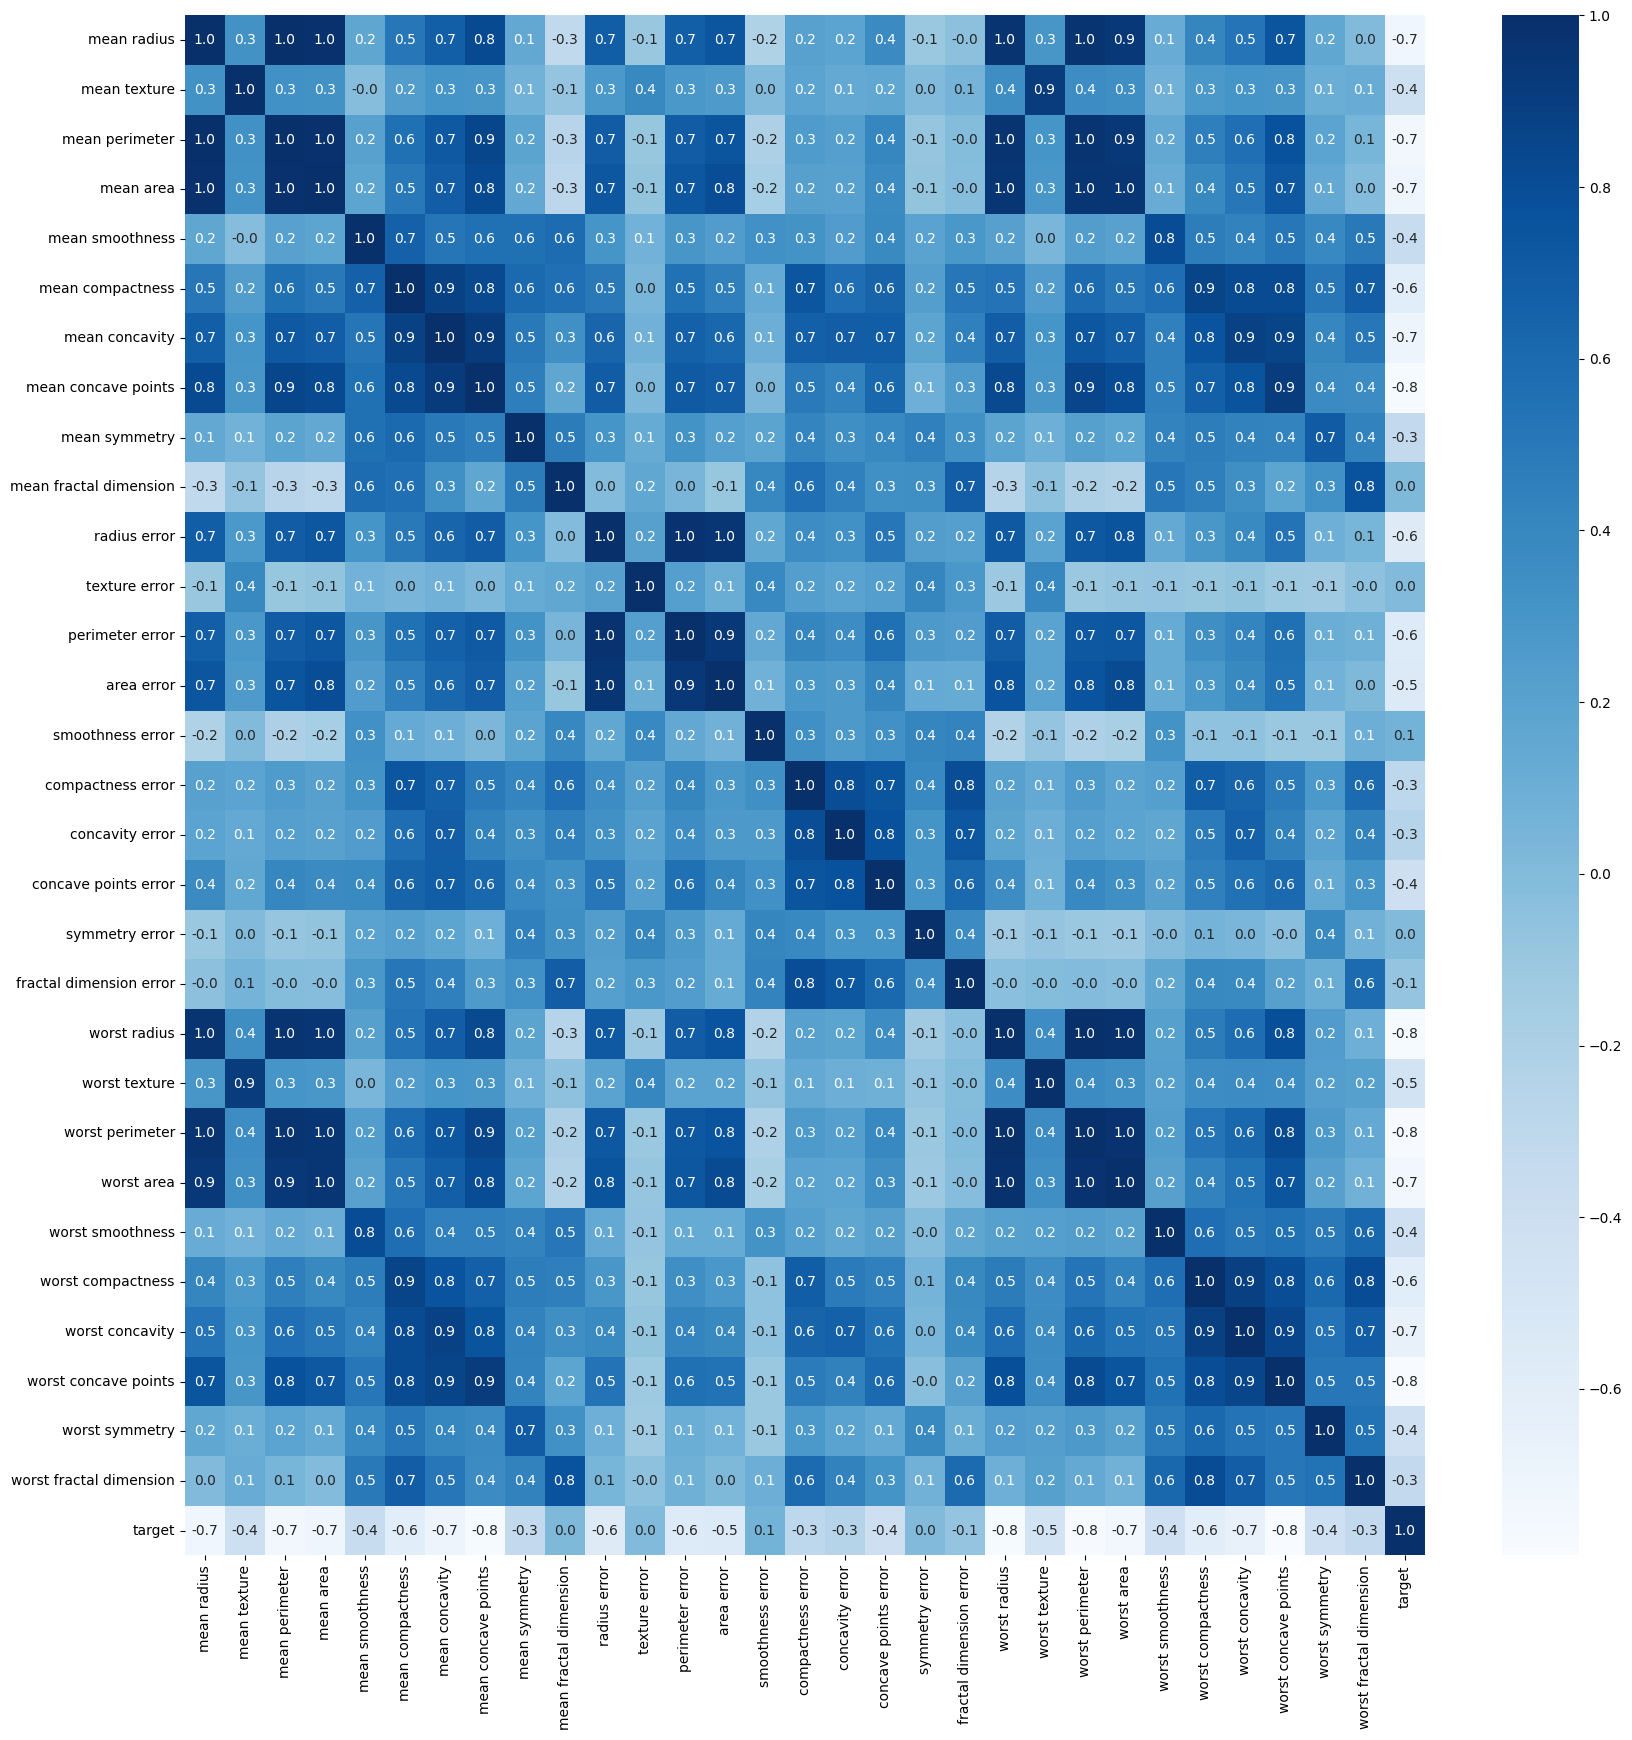

In [22]:
plt.figure(figsize=[20,20])
sns.heatmap(data = corr_matrix, fmt='.1f', annot=True, cmap='Blues')

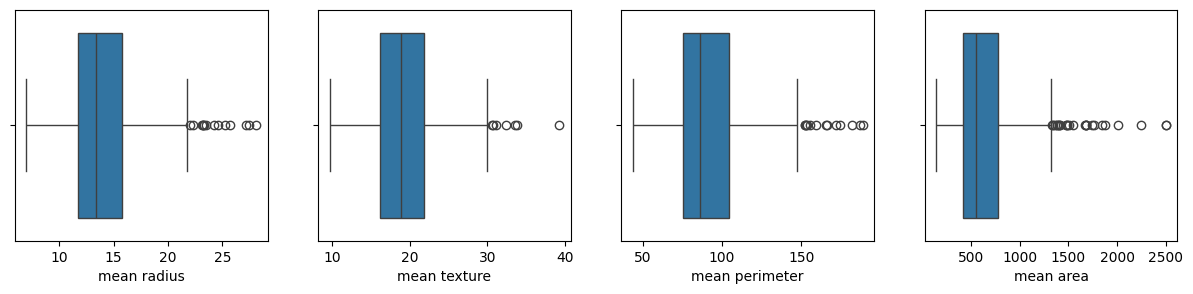

In [23]:
plt.figure(figsize=[15,3])

plt.subplot(1,4,1)
sns.boxplot(data = df, x=df['mean radius'])
plt.subplot(1,4,2)
sns.boxplot(data = df, x=df['mean texture'])
plt.subplot(1,4,3)
sns.boxplot(data = df, x=df['mean perimeter'])
plt.subplot(1,4,4)
sns.boxplot(data = df, x=df['mean area'])

plt.show()

# Machine Learning Model

In [24]:
X = df.drop('target', axis = 1)
Y = df['target']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 67)

In [26]:
from sklearn.svm import SVC
sv = SVC(kernel='linear').fit(X_train,Y_train)

In [27]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(569, 30) (455, 30) (114, 30)
(569,) (455,) (114,)


## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
from sklearn.metrics import classification_report, accuracy_score
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

In [30]:
print("Train acc :", accuracy_score(Y_train, Y_train_pred))
print("Test acc :", accuracy_score(Y_test, Y_test_pred))

Train acc : 0.9516483516483516
Test acc : 0.9385964912280702


In [31]:
print("TRAIN DATA :\n", classification_report(Y_train, Y_train_pred))
print('\n')
print("TEST DATA :\n", classification_report(Y_test, Y_test_pred))

TRAIN DATA :
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       174
           1       0.95      0.97      0.96       281

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455



TEST DATA :
               precision    recall  f1-score   support

           0       0.97      0.84      0.90        38
           1       0.93      0.99      0.96        76

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



### Accuracy score on training data is 95% approx
### Accuracy score on test data is 94% approx

# Deep Learning Model

In [32]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [33]:
pd.get_dummies(df["target"])

,0,1
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
564,True,False
565,True,False
566,True,False
567,True,False


In [34]:
Y = np.array(pd.get_dummies(df["target"]))
X = df.drop("target", axis =1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 67, test_size = 0.2, stratify = Y)

In [36]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(455, 30) (455, 2) (114, 30) (114, 2)


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [38]:
model = keras.Sequential([
    keras.layers.Input(shape = [30,]),
    
    keras.layers.Dense(units = 64, activation = "relu"),
    keras.layers.Dense(units = 32, activation = "relu"),
    keras.layers.Dense(units = 16, activation = "relu"),
    
    keras.layers.Dense(units = 2, activation = "sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 4626 (18.07 KB)
Trainable params: 4626 (18.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(loss = "CategoricalCrossentropy", optimizer = "adam" , metrics = ["accuracy"])

In [40]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(455, 30) (455, 2) (114, 30) (114, 2)


In [41]:
history = model.fit(
    X_train_std,
    Y_train,
    epochs = 50,
    batch_size = 32,
    validation_data = [X_test, Y_test]
)

Epoch 1/50
15/15 [==============================] - 1s 13ms/step - loss: 0.5915 - accuracy: 0.7209 - val_loss: 26.0914 - val_accuracy: 0.3684
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.9604 - val_loss: 104.0470 - val_accuracy: 0.3684
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.1664 - accuracy: 0.9670 - val_loss: 202.8067 - val_accuracy: 0.3684
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.9758 - val_loss: 305.1286 - val_accuracy: 0.3684
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0720 - accuracy: 0.9824 - val_loss: 380.9008 - val_accuracy: 0.3684
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9824 - val_loss: 429.6319 - val_accuracy: 0.3684
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9846 - val_loss: 462.3365 - val_accuracy: 0.3684
Epoch 

#### We started with 69% accuracy of train data and increased it to 100%, but validation loss increased hence, the model is overfitting.

In [42]:
model.predict(X_test_std) #This gives the probability.

4/4 [==============================] - 0s 1ms/step


array([[5.56312407e-05, 9.99591470e-01],
       [9.99501944e-01, 2.08517141e-03],
       [1.66423813e-01, 6.44373238e-01],
       [6.11006817e-06, 9.99905348e-01],
       [9.99990940e-01, 7.28781743e-05],
       [8.00109841e-03, 9.79143798e-01],
       [1.00000000e+00, 7.69956685e-08],
       [4.11854184e-04, 9.97661531e-01],
       [4.13160725e-03, 9.84646499e-01],
       [9.99229789e-01, 2.90591829e-03],
       [1.00000000e+00, 8.32792446e-10],
       [1.00000000e+00, 2.75188428e-10],
       [9.99997854e-01, 1.72220894e-06],
       [1.47501985e-03, 9.95237231e-01],
       [1.29148713e-03, 9.96159792e-01],
       [9.99999762e-01, 5.21205720e-06],
       [1.31288325e-04, 9.99061346e-01],
       [1.31647350e-04, 9.99262750e-01],
       [1.54827721e-04, 9.99089301e-01],
       [9.99997795e-01, 3.26819427e-05],
       [9.20419216e-01, 1.40929908e-01],
       [1.61576818e-03, 9.93819535e-01],
       [9.99996662e-01, 2.01309031e-05],
       [6.54150936e-05, 9.99562502e-01],
       [5.214286

In [43]:
pred = np.argmax(model.predict(X_test_std), axis =1) #This gives prediction values.
pred

4/4 [==============================] - 0s 2ms/step


array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0], dtype=int64)

In [44]:
pd.get_dummies(pred).value_counts().sum

<bound method Series.sum of 0      1    
False  True     72
True   False    42
Name: count, dtype: int64>

#### This means 71 tumors are predicted as 1 (Benign) and 43 tumors are predicted as 0 (Malignant).

In [45]:
# Accuracy of model on test data
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)
print(loss)

4/4 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9825
0.9824561476707458
0.11305936425924301


In [46]:
pickle.dump(sv,open('Breast_Cancer_Detection.pkl','wb'))

#### Accuracy here is 97%

# Conclusion
1. Machine learning (logistic regression) model predicted with 94% accuracy.
2. Deep Learning (ANN) model predicted with only 30% accuracy on validation data. It overfitted on our data.
3. Hence, ML models are always better for prediction when having small datasets while DL models perform wonders on large datasets.